# Trompo de Kovalevskaya

El trompo de Kovalevskaya fue descubierto por Sofya Kovalevskaya y presentado en su tesis en 1888. El trompo cumple la condición de que $I_1=I_2=2I$ y $I_3=I$. Las ecuaciones de movimiento del trompo vienen dadas por las ecuaciones de Euler:

\begin{equation}
2I\dot{p} = qr \\
2I\dot{q} = -pr - c\gamma'' \\
I\dot{r} = c\gamma'
\end{equation}


\begin{equation}
\dot{\gamma} = r\gamma' - q\gamma'' \\
\dot{\gamma'} = p\gamma'' - r\gamma \\
\dot{\gamma''} = q\gamma -p\gamma'
\end{equation}

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from scipy.integrate import odeint

Y0=[0.54,0.78,1.2,np.pi/4,0,0] #arreglo con las condiciones iniciales 
t=np.linspace(0,40,10000) #tiempo que dura la vaina (100!!!)

M=1
g=9.8
I=1
x0=400
y0=0
z0=0
c=M*g*x0

def g(Y,t):
    p,q,r,th,ph,ps = Y 
    
    dp = q*r/(2*I)
    dq = (-p*r - c*np.cos(th))/(2*I)
    dr = c*np.sin(th)*np.cos(ps)/I
    
    dth = p*np.cos(ps) - q*np.sin(ps)
    #dph = (1/(np.sin(th)*np.sin(ps)))*(p-dth*np.cos(ps))
    #dph = (1/(np.sin(th)*np.cos(ps)))*(q+dth*np.sin(ps))
    dph = (1/np.sin(th))*(p*np.sin(ps) + q*np.cos(ps))
    dps = r - dph*np.cos(th)
    
    return np.array([dp,dq,dr,dth,dph,dps])

sol=odeint(g,Y0,t)

w1 = sol[:,0]
w2 = sol[:,1]
w3 = sol[:,2]
theta = sol[:,3]
phi = sol[:,4]
psi = sol[:,5]

X = np.sin(psi)*np.sin(theta)
Y = np.cos(psi)*np.sin(theta)
Z = np.cos(theta)

#for pos, element in enumerate(phi):
#    phi[pos]=element%(2*np.pi)

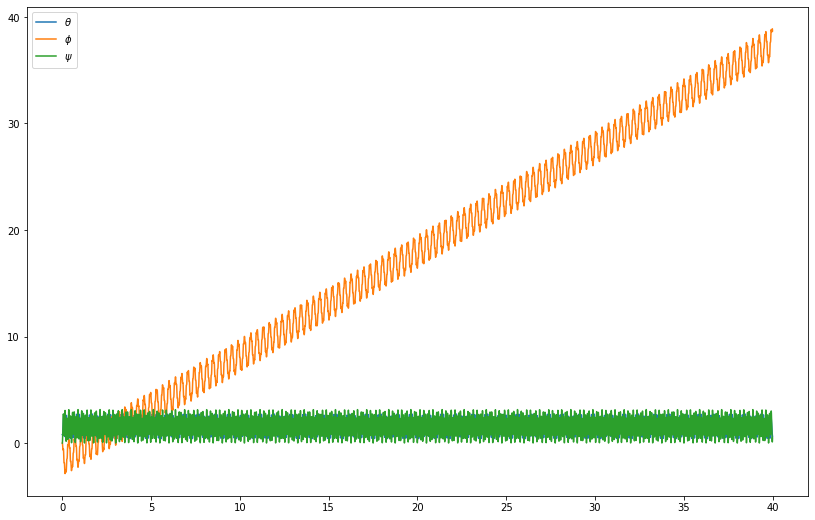

In [76]:
plt.figure(figsize=(14,9))
plt.plot(t,theta,label='$\\theta$')
plt.plot(t,phi, label='$\phi$')
plt.plot(t,psi, label='$\psi$')
plt.legend()

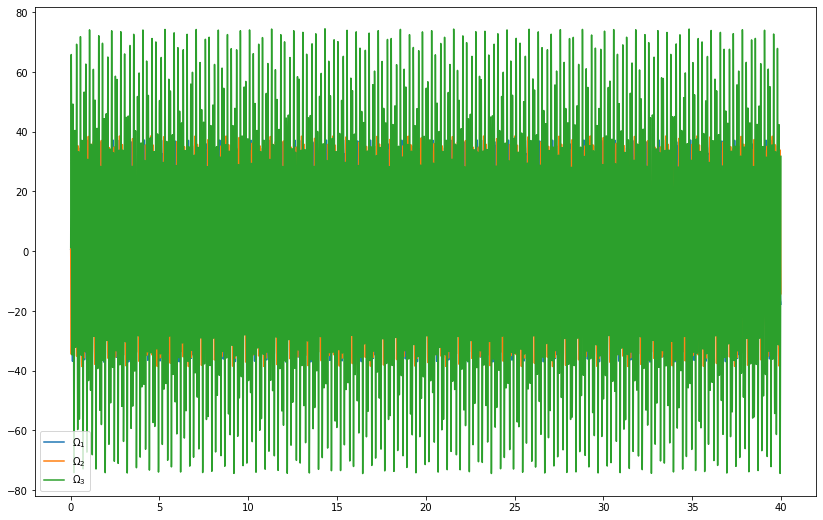

In [77]:
plt.figure(figsize=(14,9))
plt.plot(t,w1,label='$\Omega_1$')
plt.plot(t,w2,label='$\Omega_2$')
plt.plot(t,w3,label='$\Omega_3$')
plt.legend()

MovieWriter stderr:
convert-im6.q16hdri: no images defined `matplot.gif' @ error/convert.c/ConvertImageCommand/3258.



CalledProcessError: Command '['convert', '-size', '1008x648', '-depth', '8', '-delay', '0.001', '-loop', '0', 'rgba:-', 'matplot.gif']' returned non-zero exit status 1.

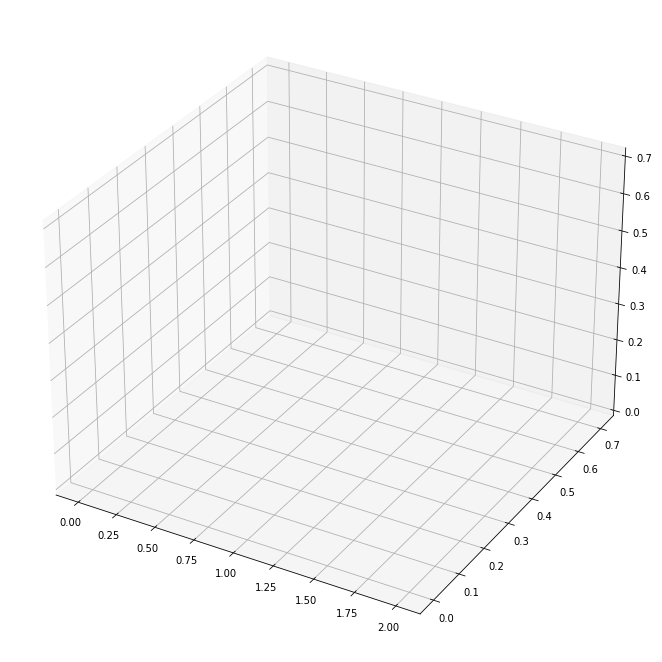

In [68]:
fig = plt.figure(figsize=(14,9))
ax = p3.Axes3D(fig)

N=len(phi)

def update(num):
    x,y,z = X[num], Y[num], Z[num] 
    line.set_data(x,y)
    line.set_3d_properties(z)
    return line

line, = ax.plot((x0,X[0]),(0,Y[0]),(0,Z[0]))

ani = animation.FuncAnimation(fig, update, N, interval=100/N, blit=False)
ani.save('matplot.gif', writer='imagemagick')

#from IPython.display import HTML
#HTML(ani.to_jshtml())

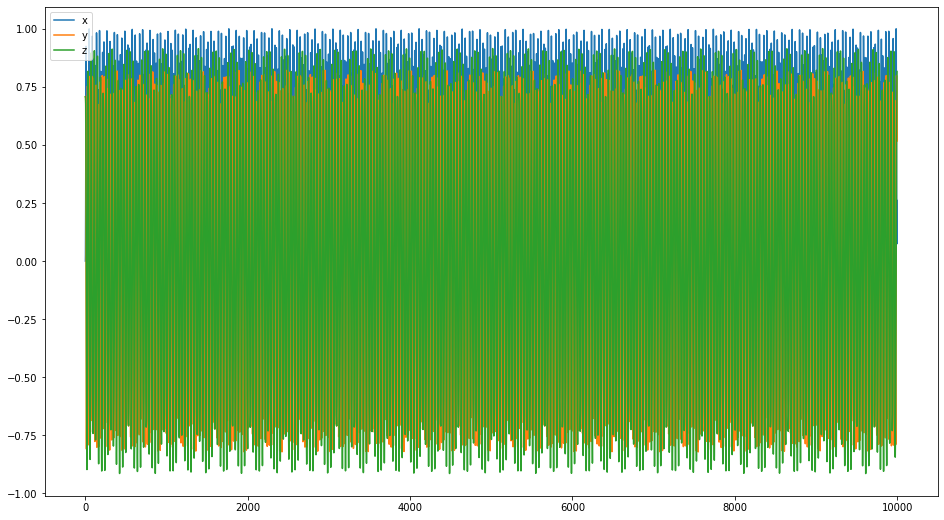

In [78]:
plt.figure(figsize=(16,9))
plt.plot(X,label="x")
plt.plot(Y,label="y")
plt.plot(Z,label="z")

plt.legend()